In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/passenger-list-for-the-estonia-ferry-disaster/estonia-passenger-list.csv


This is one of my first ML programs so feedback would be appreciated, I'm always looking to improve :)

In [2]:
#IMPORTED STUFF
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [3]:
#IMPORTED ML ALGORITHMS
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#IMPORTING MAE
from sklearn.metrics import mean_absolute_error

In [4]:
#Reading the Data
df = pd.read_csv('../input/passenger-list-for-the-estonia-ferry-disaster/estonia-passenger-list.csv')

In [5]:
#Basic Data Exploration

#Checking first few rows of data
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [6]:
#We don't require the columns PassengerId, Firstname and Lastname so we drop those columns.
df = df.drop(['PassengerId', 'Firstname', 'Lastname'], axis=1)

In [7]:
df.shape

(989, 5)

In [8]:
#Checking Data Types and Null Counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   989 non-null    object
 1   Sex       989 non-null    object
 2   Age       989 non-null    int64 
 3   Category  989 non-null    object
 4   Survived  989 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 38.8+ KB


In [9]:
#Checking how many null values we have
df.isnull().sum()

Country     0
Sex         0
Age         0
Category    0
Survived    0
dtype: int64

There are no null values in this dataset.

In [10]:
df.describe()

,Age,Survived
count,989.000000,989.000000
mean,44.575329,0.138524
std,17.235146,0.345624
min,0.000000,0.000000
25%,30.000000,0.000000
50%,44.000000,0.000000
75%,59.000000,0.000000
max,87.000000,1.000000


In [11]:
#Checking Value Counts

#Country Value Counts
df.Country.value_counts()

Sweden           550
Estonia          344
Latvia            28
Finland           16
Russia            14
Norway             9
Germany            8
Denmark            6
Lithuania          4
Great Britain      2
Morocco            2
Netherlands        2
France             1
Nigeria            1
Canada             1
Belarus            1
Name: Country, dtype: int64

In [12]:
#Sex Value Counts
df.Sex.value_counts()

M    503
F    486
Name: Sex, dtype: int64

In [13]:
#Category Value Counts
df.Category.value_counts()

P    796
C    193
Name: Category, dtype: int64

# Basic Data Visualisation 

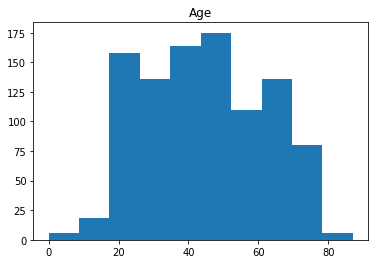

In [14]:
#Plotting Histogram For Age
plt.hist(df.Age)
plt.title("Age")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

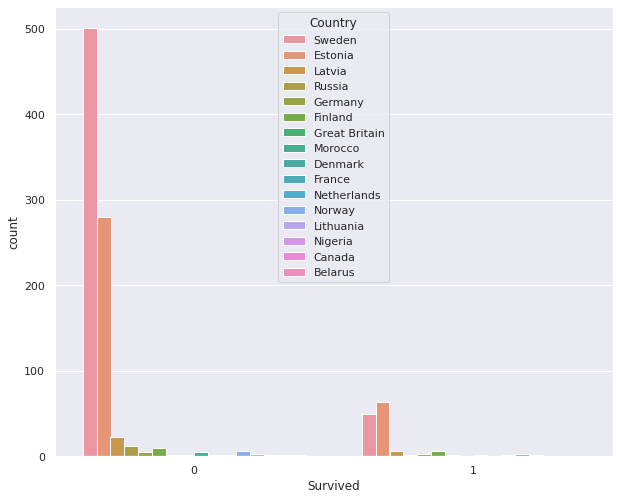

In [15]:
#How does Country affect survival
sns.set(rc={'figure.figsize':(10,8.27)})
sns.countplot(x = df['Survived'] , hue = 'Country', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

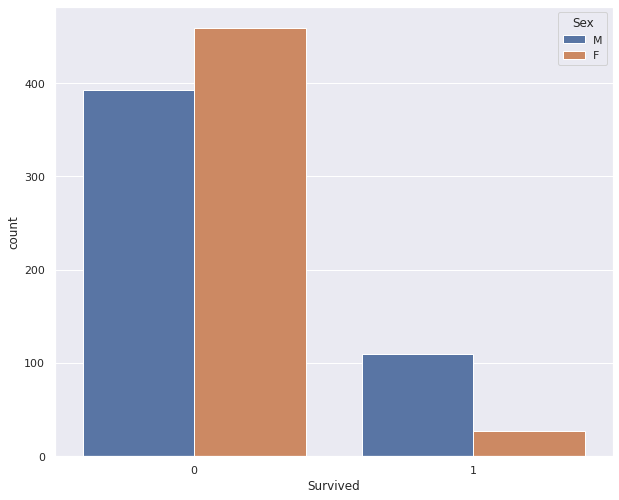

In [16]:
#How does Sex affect Survival
sns.countplot(x = df['Survived'], hue = 'Sex' , data = df)

M = Male, 
F = Female

<AxesSubplot:xlabel='Survived', ylabel='count'>

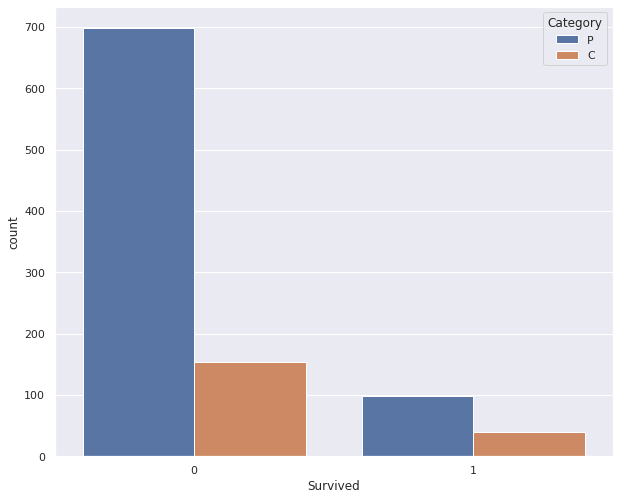

In [17]:
#How does Category affect survival
sns.countplot(x = df['Survived'], hue = 'Category', data = df)

P = Passenger, C = Crew

In [18]:
#Converting the categorical (Country, Sex, Category) data into numeric data
encoder = LabelEncoder()
for i in list(df.columns):
    if df[i].dtype=='object':
        df[i]=encoder.fit_transform(df[i])

In [19]:
df.head()

,Country,Sex,Age,Category,Survived
0,15,1,62,1,0
1,3,0,22,0,0
2,3,0,21,0,0
3,15,1,53,0,0
4,15,0,55,1,0


In [20]:
#Setting Target Variables and Independant Variables
X = df.loc[:, ['Country', 'Sex', 'Age', 'Category']]
y = df.loc[:, 'Survived']

In [21]:
#Splitting data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [22]:
#Test Using Random Forest Classifier
#With help of https://www.kaggle.com/nelsonmalgro/newbie-titanic
model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [23]:
print("Accuracy:", model.score(X_train, y_train))
print("Mean Absolute Error:", mean_absolute_error(y_test, preds))

Accuracy: 0.8836915297092288
Mean Absolute Error: 0.15151515151515152


In [24]:
#Test Using Logistic Regression
model = LogisticRegression(random_state = 1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [25]:
print("Accuracy:", model.score(X_train, y_train))
print("Mean Absolute Error:", mean_absolute_error(y_test, preds))

Accuracy: 0.8647281921618205
Mean Absolute Error: 0.15151515151515152


In [26]:
#Test Using K Neighbours Classifier
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [27]:
print("Accuracy:", model.score(X_train, y_train))
print("Mean Absolute Error:", mean_absolute_error(y_test, preds))

Accuracy: 0.877370417193426
Mean Absolute Error: 0.15151515151515152


In [28]:
#Test Using Decision Trees
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [29]:
print("Accuracy:", model.score(X_train, y_train))
print("Mean Absolute Error:", mean_absolute_error(y_test, preds))

Accuracy: 0.9203539823008849
Mean Absolute Error: 0.15656565656565657


In [30]:
#Test Using Gradient Boosting Classifier
model = GradientBoostingClassifier(learning_rate = 0.0001)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [31]:
print("Accuracy:", model.score(X_train, y_train))
print("Mean Absolute Error:", mean_absolute_error(y_test, preds))

Accuracy: 0.8647281921618205
Mean Absolute Error: 0.15151515151515152


#### Algorithms Used: 
##### Random Forest Classifier (Acc ~88%)
##### Logistic Regression (Acc ~86%)
##### K Neighbours Classifier (Acc ~87%)
##### Decision Trees Classifier (Acc ~92%)
##### Gradient Boosting Classifier (Acc ~86%)

Decision Trees gave the best accuracy score of around 92%